In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel("TwoAirlineFlights.xlsx")

In [3]:
df.head()

,day_of_week,fl_date,airline,tail_number,flight_number,origin_airport,destination_airport,crs_departure_time,departure_time,departure_delay,...,cancelled,cancellation_code,diverted,air_time,distance,airline_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,2019-07-01,BA,N926DZ,829,MSP,SLC,1442,1440.0,-2.0,...,0,NaN,0,143.0,991,NaN,NaN,NaN,NaN,NaN
1,1,2019-07-01,BA,N840DN,2543,DEN,JFK,603,602.0,-1.0,...,0,NaN,0,208.0,1626,NaN,NaN,NaN,NaN,NaN
2,1,2019-07-01,AA,N970NN,1500,JFK,CLT,1357,1357.0,0.0,...,0,NaN,0,79.0,541,NaN,NaN,NaN,NaN,NaN
3,1,2019-07-01,AA,N691AA,2234,JFK,DFW,645,645.0,0.0,...,0,NaN,0,171.0,1391,NaN,NaN,NaN,NaN,NaN
4,1,2019-07-01,AA,N710UW,1794,RDU,CLT,1807,1814.0,7.0,...,0,NaN,0,35.0,130,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(346580, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346580 entries, 0 to 346579
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   day_of_week          346580 non-null  int64  
 1   fl_date              346580 non-null  object 
 2   airline              346580 non-null  object 
 3   tail_number          346568 non-null  object 
 4   flight_number        346580 non-null  int64  
 5   origin_airport       346580 non-null  object 
 6   destination_airport  346580 non-null  object 
 7   crs_departure_time   346580 non-null  int64  
 8   departure_time       341875 non-null  float64
 9   departure_delay      341875 non-null  float64
 10  taxi_out             341609 non-null  float64
 11  taxi_in              341526 non-null  float64
 12  crs_arrival_time     346580 non-null  int64  
 13  arrival_time         341526 non-null  float64
 14  arrival_delay        340388 non-null  float64
 15  cancelled        

In [6]:
df.describe()

,day_of_week,flight_number,crs_departure_time,departure_time,departure_delay,taxi_out,taxi_in,crs_arrival_time,arrival_time,arrival_delay,cancelled,diverted,air_time,distance,airline_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,346580.000000,346580.000000,346580.000000,341875.000000,341875.000000,341609.000000,341526.000000,346580.000000,341526.000000,340388.000000,346580.000000,346580.000000,340388.000000,346580.000000,69076.000000,69076.000000,69076.000000,69076.000000,69076.000000
mean,3.896010,1642.964245,1328.579540,1329.562878,13.724376,18.040593,8.896573,1486.476663,1446.988856,7.526822,0.014409,0.003457,128.598734,966.167176,25.411387,4.456512,17.948332,0.099890,26.714112
std,1.979925,792.309766,505.556522,525.415384,54.632282,10.391346,7.373683,534.459489,566.226441,56.631293,0.119171,0.058692,74.904887,645.191502,77.556000,28.832025,42.806411,3.042916,54.428505
min,1.000000,1.000000,5.000000,1.000000,-28.000000,1.000000,1.000000,1.000000,1.000000,-88.000000,0.000000,0.000000,20.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1022.000000,900.000000,857.000000,-4.000000,12.000000,5.000000,1054.000000,1029.000000,-15.000000,0.000000,0.000000,73.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1677.000000,1313.000000,1313.000000,-2.000000,15.000000,7.000000,1514.000000,1451.500000,-6.000000,0.000000,0.000000,110.000000,801.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,2310.000000,1740.000000,1749.000000,9.000000,20.000000,10.000000,1930.000000,1923.000000,8.000000,0.000000,0.000000,164.000000,1258.000000,22.000000,0.000000,20.000000,0.000000,31.000000
max,7.000000,3088.000000,2359.000000,2400.000000,2315.000000,181.000000,189.000000,2359.000000,2400.000000,2350.000000,1.000000,1.000000,561.000000,4502.000000,2315.000000,1148.000000,1152.000000,434.000000,1188.000000


In [7]:
barrydf = df[df['airline'].str.contains("BA")]
barrydf.head()

,day_of_week,fl_date,airline,tail_number,flight_number,origin_airport,destination_airport,crs_departure_time,departure_time,departure_delay,...,cancelled,cancellation_code,diverted,air_time,distance,airline_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,2019-07-01,BA,N926DZ,829,MSP,SLC,1442,1440.0,-2.0,...,0,NaN,0,143.0,991,NaN,NaN,NaN,NaN,NaN
1,1,2019-07-01,BA,N840DN,2543,DEN,JFK,603,602.0,-1.0,...,0,NaN,0,208.0,1626,NaN,NaN,NaN,NaN,NaN
5,1,2019-07-01,BA,N905DE,1205,ATL,SDF,1853,1853.0,0.0,...,0,NaN,0,51.0,321,NaN,NaN,NaN,NaN,NaN
6,1,2019-07-01,BA,N889DN,1449,SJC,MSP,1125,1124.0,-1.0,...,0,NaN,0,184.0,1575,NaN,NaN,NaN,NaN,NaN
9,1,2019-07-01,BA,N818DA,2587,ATL,DAB,2232,2224.0,-8.0,...,0,NaN,0,55.0,366,NaN,NaN,NaN,NaN,NaN


In [8]:
acorndf = df[df['airline'].str.contains("AA")]
acorndf.head()

,day_of_week,fl_date,airline,tail_number,flight_number,origin_airport,destination_airport,crs_departure_time,departure_time,departure_delay,...,cancelled,cancellation_code,diverted,air_time,distance,airline_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
2,1,2019-07-01,AA,N970NN,1500,JFK,CLT,1357,1357.0,0.0,...,0,NaN,0,79.0,541,NaN,NaN,NaN,NaN,NaN
3,1,2019-07-01,AA,N691AA,2234,JFK,DFW,645,645.0,0.0,...,0,NaN,0,171.0,1391,NaN,NaN,NaN,NaN,NaN
4,1,2019-07-01,AA,N710UW,1794,RDU,CLT,1807,1814.0,7.0,...,0,NaN,0,35.0,130,NaN,NaN,NaN,NaN,NaN
7,1,2019-07-01,AA,N902NN,352,SJC,DFW,1402,1446.0,44.0,...,0,NaN,0,194.0,1438,0.0,0.0,43.0,0.0,0.0
8,1,2019-07-01,AA,N647AW,486,PHX,SNA,747,847.0,60.0,...,0,NaN,0,53.0,338,0.0,0.0,0.0,48.0,0.0


<Axes: title={'center': 'Distance vs Late Aircraft Delay'}, xlabel='late_aircraft_delay', ylabel='distance'>

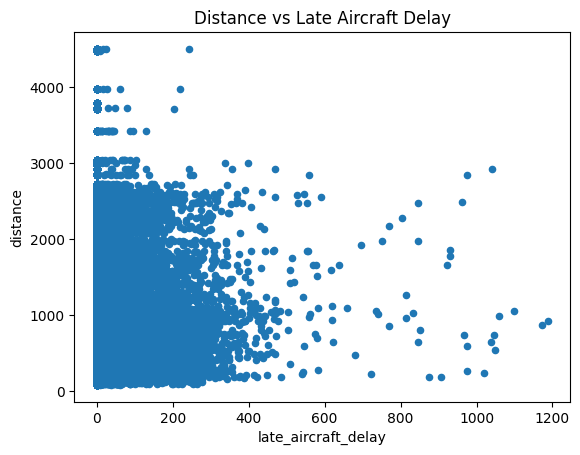

In [9]:
df['late_aircraft_delay'] = df['late_aircraft_delay'].fillna(0)
df.plot.scatter(x='late_aircraft_delay', y='distance', title="Distance vs Late Aircraft Delay")

/var/folders/wg/94qct4cj7dd8zvyqctl1sxh40000gn/T/ipykernel_30767/1149702534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

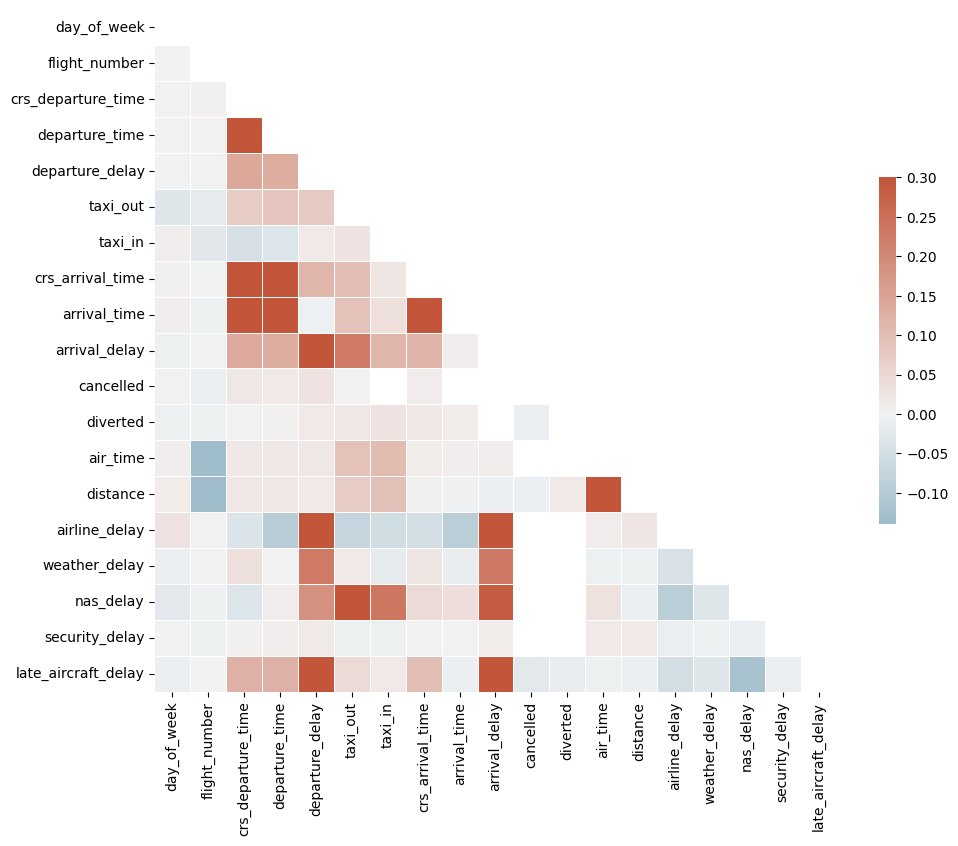

In [10]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/javianng/opt/anaconda3/envs/DataScien

<Axes: xlabel='flight_number', ylabel='arrival_delay'>

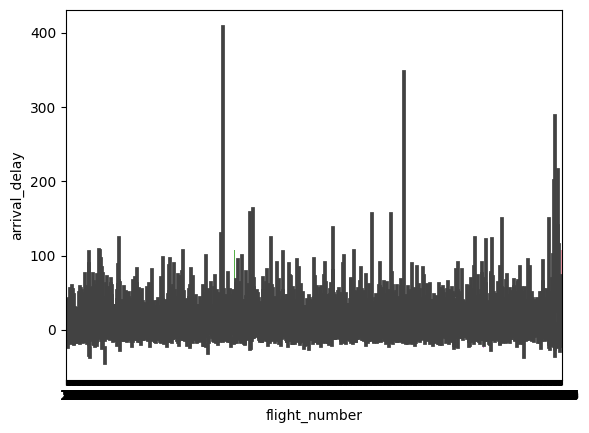

In [11]:
sns.barplot(data=acorndf, x="flight_number", y="arrival_delay")